## Thông tin bài làm

- **Môn** :Xử lý số liệu thống kê
- **Đồ án cuối kì môn**: Project 2- Thuê xe đạp công cộng ở Seoul
- **Lớp**: 21TTH-KDL


***Thông tin nhóm sinh viên thực hiện bài làm: ***

Nhóm thực hiện: K

| Tên Sinh Viên | Mã Số Sinh Viên |
|----------------|------------------|
|       Lâm Gia Phú         |         21280104         |
| Trần Ngọc Khánh Như | 21280040|
| Trần Minh Hiển | 21280016|
| Nguyễn Đăng Khôi| 21280023|

# 1. Cài đặt thư viện

In [ ]:
install.packages("httr")
install.packages("data.table")
install.packages("reshape2")
install.packages("janitor")
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 2. Các thư viên sử dụng

In [ ]:
library(tidyverse)
library(httr)
library(data.table)
library(dplyr)
library(magrittr)
library(reshape2)
library(janitor)
library(splines)
library(mgcv)
library(randomForest)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘pa

# 3. Tải dữ liệu và trích xuất các tính năng

In [ ]:
# Đặt ID của tệp
file_id <- "10E6itW53c56XBAjpA50qKlJb6lqI_VfK"

# Tạo URL tải xuống trực tiếp
url <- sprintf("https://docs.google.com/uc?id=%s&export=download", file_id)

# Tải xuống tệp
temp_file <- tempfile(fileext = ".csv")
GET(url, write_disk(temp_file, overwrite = TRUE))

# Đọc tệp CSV vào DataFrame với fread và mã hóa UTF-8
DF <- fread(temp_file, encoding = "UTF-8", header = TRUE)

# Đặt tên các cột thủ công
colnames(DF) <- c(
  "Date", "Rented Bike Count", "Hour", "Temperature(°C)", "Humidity(%)",
  "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)",
  "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)", "Seasons",
  "Holiday", "Functioning Day"
)

# Kiểm tra cấu trúc của DataFrame
glimpse(DF)


Response [https://drive.usercontent.google.com/download?id=10E6itW53c56XBAjpA50qKlJb6lqI_VfK&export=download]
  Date: 2024-07-28 07:45
  Status: 200
  Content-Type: application/octet-stream
  Size: 604 kB
<ON DISK>  /tmp/RtmptsrRef/file2fb36016b63.csvNULL

Rows: 8,760
Columns: 14
$ Date                        <chr> "01/12/2017", "01/12/2017", "01/12/2017", …
$ `Rented Bike Count`         <int> 254, 204, 173, 107, 78, 100, 181, 460, 930…
$ Hour                        <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, …
$ `Temperature(°C)`           <dbl> -5.2, -5.5, -6.0, -6.2, -6.0, -6.4, -6.6, …
$ `Humidity(%)`               <int> 37, 38, 39, 40, 36, 37, 35, 38, 37, 27, 24…
$ `Wind speed (m/s)`          <dbl> 2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 0.9, 1.…
$ `Visibility (10m)`          <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ `Dew point temperature(°C)` <dbl> -17.6, -17.6, -17.7, -17.6, -18.6, -18.7, …
$ `Solar Radiation (MJ/m2)`   <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, …
$ `Rainfall(mm)`              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ `Snowfall (cm)`             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Seasons                     <chr> "Winter", "Winter", "Winter", "Winter", "W…
$ Holiday       

In [ ]:
summary(DF)

     Date           Rented Bike Count      Hour       Temperature(°C) 
 Length:8760        Min.   :   0.0    Min.   : 0.00   Min.   :-17.80  
 Class :character   1st Qu.: 191.0    1st Qu.: 5.75   1st Qu.:  3.50  
 Mode  :character   Median : 504.5    Median :11.50   Median : 13.70  
                    Mean   : 704.6    Mean   :11.50   Mean   : 12.88  
                    3rd Qu.:1065.2    3rd Qu.:17.25   3rd Qu.: 22.50  
                    Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
  Humidity(%)    Wind speed (m/s) Visibility (10m) Dew point temperature(°C)
 Min.   : 0.00   Min.   :0.000    Min.   :  27     Min.   :-30.600          
 1st Qu.:42.00   1st Qu.:0.900    1st Qu.: 940     1st Qu.: -4.700          
 Median :57.00   Median :1.500    Median :1698     Median :  5.100          
 Mean   :58.23   Mean   :1.725    Mean   :1437     Mean   :  4.074          
 3rd Qu.:74.00   3rd Qu.:2.300    3rd Qu.:2000     3rd Qu.: 14.800          
 Max.   :98.00   Max.   :7.400    Max.   

# 4. Làm sạch dữ liệu

Kiểm tra bên trong tập dữ liệu có tồn tại các giá trị ngoại lai để làm sạch và đưa ra phương án giải quyết làm sạch dữ liệu.

In [ ]:
# Định nghĩa hàm check để kiểm tra các đặc tính của các cột trong DataFrame
check <- function(df) {
  l <- list()  # Khởi tạo một danh sách rỗng để lưu trữ thông tin về các cột
  columns <- colnames(df)  # Lấy tên của tất cả các cột trong DataFrame df

  # Duyệt qua từng cột trong danh sách columns
  for (col in columns) {
    dtypes <- class(df[[col]])  # Lấy kiểu dữ liệu của cột hiện tại
    nunique <- length(unique(df[[col]]))  # Đếm số lượng giá trị duy nhất trong cột
    sum_null <- sum(is.na(df[[col]]))  # Đếm số lượng giá trị bị thiếu (NA) trong cột

    # Thêm thông tin của cột vào danh sách l
    l <- append(l, list(c(col, dtypes, nunique, sum_null)))
  }

  # Chuyển đổi danh sách l thành một DataFrame
  df_check <- as.data.frame(do.call(rbind, l), stringsAsFactors = FALSE)

  # Đặt tên cho các cột trong DataFrame kết quả
  colnames(df_check) <- c('column', 'dtypes', 'nunique', 'sum_null')


  # Trả về DataFrame kết quả
  df_check
}

# Gọi hàm check với DataFrame DF
check(DF)


column,dtypes,nunique,sum_null
<chr>,<chr>,<chr>,<chr>
Date,character,365,0
Rented Bike Count,integer,2166,0
Hour,integer,24,0
Temperature(°C),numeric,546,0
Humidity(%),integer,90,0
Wind speed (m/s),numeric,65,0
Visibility (10m),integer,1789,0
Dew point temperature(°C),numeric,556,0
Solar Radiation (MJ/m2),numeric,345,0


In [ ]:
# In ra các giá trị null
cat("Null in number:\n")
print(colSums(is.na(DF)))

Null in number:
                     Date         Rented Bike Count                      Hour 
                        0                         0                         0 
          Temperature(°C)               Humidity(%)          Wind speed (m/s) 
                        0                         0                         0 
         Visibility (10m) Dew point temperature(°C)   Solar Radiation (MJ/m2) 
                        0                         0                         0 
             Rainfall(mm)             Snowfall (cm)                   Seasons 
                        0                         0                         0 
                  Holiday           Functioning Day 
                        0                         0 


In [ ]:
# Định nghĩa một hàm để tính phần trăm giá trị bị thiếu (NA) trong một cột
calculate_null_percentage <- function(column_data) {
  null_count <- sum(is.na(column_data))  # Đếm số lượng giá trị bị thiếu (NA) trong cột
  total_count <- length(column_data)  # Tổng số lượng giá trị trong cột
  null_percentage <- (null_count / total_count) * 100  # Tính phần trăm giá trị bị thiếu
  return(null_percentage)  # Trả về phần trăm giá trị bị thiếu
}

# In ra phần trăm giá trị bị thiếu cho từng cột
cat("Null in percentage:\n")
for (col_name in colnames(DF)) {  # Duyệt qua từng tên cột trong DataFrame DF
  null_percentage <- calculate_null_percentage(DF[[col_name]])  # Tính phần trăm giá trị bị thiếu của cột hiện tại
  cat(sprintf("%s: %.2f%%\n", col_name, null_percentage))  # In ra tên cột và phần trăm giá trị bị thiếu với định dạng %.2f
}


Null in percentage:
Date: 0.00%
Rented Bike Count: 0.00%
Hour: 0.00%
Temperature(°C): 0.00%
Humidity(%): 0.00%
Wind speed (m/s): 0.00%
Visibility (10m): 0.00%
Dew point temperature(°C): 0.00%
Solar Radiation (MJ/m2): 0.00%
Rainfall(mm): 0.00%
Snowfall (cm): 0.00%
Seasons: 0.00%
Holiday: 0.00%
Functioning Day: 0.00%


In [ ]:
# Làm sạch tên của các cột
DF <- DF %>% clean_names()
glimpse(DF)

Rows: 8,760
Columns: 14
$ date                    <chr> "01/12/2017", "01/12/2017", "01/12/2017", "01/…
$ rented_bike_count       <int> 254, 204, 173, 107, 78, 100, 181, 460, 930, 49…
$ hour                    <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ temperature_c           <dbl> -5.2, -5.5, -6.0, -6.2, -6.0, -6.4, -6.6, -7.4…
$ humidity_percent        <int> 37, 38, 39, 40, 36, 37, 35, 38, 37, 27, 24, 21…
$ wind_speed_m_s          <dbl> 2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 0.9, 1.1, 0…
$ visibility_10m          <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000…
$ dew_point_temperature_c <dbl> -17.6, -17.6, -17.7, -17.6, -18.6, -18.7, -19.…
$ solar_radiation_mj_m2   <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00…
$ rainfall_mm             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ snowfall_cm             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ seasons                 <chr> "Winter", "Winter", "Winter", "Winter", "Winte…
$ holiday       

In [ ]:
# Định nghĩa hàm chuyển đổi và tách cột ngày tháng
convert_and_separate_date <- function(df) {
  df$Date <- as.Date(df$date, format = "%d/%m/%Y")  # Chuyển đổi cột 'Date' sang kiểu Date với định dạng ngày/tháng/năm
  df$Day <- format(df$date, "%d")  # Tách ngày từ cột 'Date' và lưu vào cột 'Day'
  df$Month <- format(df$date, "%m")  # Tách tháng từ cột 'Date' và lưu vào cột 'Month'
  df$Year <- format(df$date, "%Y")  # Tách năm từ cột 'Date' và lưu vào cột 'Year'

  return(df)  # Trả về DataFrame sau khi đã chuyển đổi và tách cột ngày tháng
}

# Định nghĩa hàm hiển thị các giá trị duy nhất và mã hóa các cột phân loại
uniqueValuesAndEncode <- function(df, columns) {
  for (column in columns) {  # Duyệt qua từng cột trong danh sách columns
    unique_vals <- unique(df[[column]])  # Lấy các giá trị duy nhất trong cột hiện tại

    # Mã hóa
    df[[column]] <- match(df[[column]], unique_vals)  # Mã hóa các giá trị duy nhất trong cột thành các số nguyên tương ứng
  }
  return(df)  # Trả về DataFrame sau khi đã mã hóa các cột phân loại
}

columns <- c("seasons", "holiday", "functioning_day")  # Danh sách các cột phân loại cần mã hóa
encoded_data <- uniqueValuesAndEncode(DF, columns)  # Gọi hàm uniqueValuesAndEncode với DataFrame DF và danh sách các cột cần mã hóa
print(encoded_data)  # In ra DataFrame sau khi mã hóa
View(encoded_data)  # Hiển thị DataFrame trong cửa sổ xem dữ liệu (áp dụng trong RStudio)


            date rented_bike_count  hour temperature_c humidity_percent
          <char>             <int> <int>         <num>            <int>
   1: 01/12/2017               254     0          -5.2               37
   2: 01/12/2017               204     1          -5.5               38
   3: 01/12/2017               173     2          -6.0               39
   4: 01/12/2017               107     3          -6.2               40
   5: 01/12/2017                78     4          -6.0               36
  ---                                                                  
8756: 30/11/2018              1003    19           4.2               34
8757: 30/11/2018               764    20           3.4               37
8758: 30/11/2018               694    21           2.6               39
8759: 30/11/2018               712    22           2.1               41
8760: 30/11/2018               584    23           1.9               43
      wind_speed_m_s visibility_10m dew_point_temperature_c
    

date,rented_bike_count,hour,temperature_c,humidity_percent,wind_speed_m_s,visibility_10m,dew_point_temperature_c,solar_radiation_mj_m2,rainfall_mm,snowfall_cm,seasons,holiday,functioning_day
<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0,0,1,1,1
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0,0,1,1,1
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0,0,1,1,1
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0,0,1,1,1
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0,0,1,1,1
01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0,0,1,1,1
01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0,0,1,1,1
01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0,0,1,1,1
01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0,0,1,1,1


# 5. Trực quan hóa dữ liệu


In [ ]:
glimpse(DF)

Rows: 8,760
Columns: 14
$ date                    <chr> "01/12/2017", "01/12/2017", "01/12/2017", "01/…
$ rented_bike_count       <int> 254, 204, 173, 107, 78, 100, 181, 460, 930, 49…
$ hour                    <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ temperature_c           <dbl> -5.2, -5.5, -6.0, -6.2, -6.0, -6.4, -6.6, -7.4…
$ humidity_percent        <int> 37, 38, 39, 40, 36, 37, 35, 38, 37, 27, 24, 21…
$ wind_speed_m_s          <dbl> 2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 0.9, 1.1, 0…
$ visibility_10m          <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000…
$ dew_point_temperature_c <dbl> -17.6, -17.6, -17.7, -17.6, -18.6, -18.7, -19.…
$ solar_radiation_mj_m2   <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00…
$ rainfall_mm             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ snowfall_cm             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ seasons                 <chr> "Winter", "Winter", "Winter", "Winter", "Winte…
$ holiday       

**Số lượng thuê xe theo mùa**

In [ ]:
# Nhóm dữ liệu theo cột 'Seasons' và tóm tắt các giá trị trung bình, lớn nhất, và nhỏ nhất của 'Rented Bike Count'
seasonal_summary <- DF %>%
  group_by(seasons) %>%  # Nhóm dữ liệu theo cột 'Seasons'
  summarise(
    Average_Rented_Bike_Count = mean(rented_bike_count, na.rm = TRUE),  # Tính giá trị trung bình của 'Rented Bike Count', bỏ qua các giá trị NA
    Max_Rented_Bike_Count = max(rented_bike_count, na.rm = TRUE),  # Tính giá trị lớn nhất của 'Rented Bike Count', bỏ qua các giá trị NA
    Min_Rented_Bike_Count = min(rented_bike_count, na.rm = TRUE)  # Tính giá trị nhỏ nhất của 'Rented Bike Count', bỏ qua các giá trị NA
  )

# In ra bảng tóm tắt
print(seasonal_summary)



# A tibble: 4 × 4
  seasons Average_Rented_Bike_Count Max_Rented_Bike_Count Min_Rented_Bike_Count
  <chr>                       <dbl>                 <int>                 <int>
1 Autumn                       820.                  3298                     0
2 Spring                       730.                  3251                     0
3 Summer                      1034.                  3556                     9
4 Winter                       226.                   937                     3


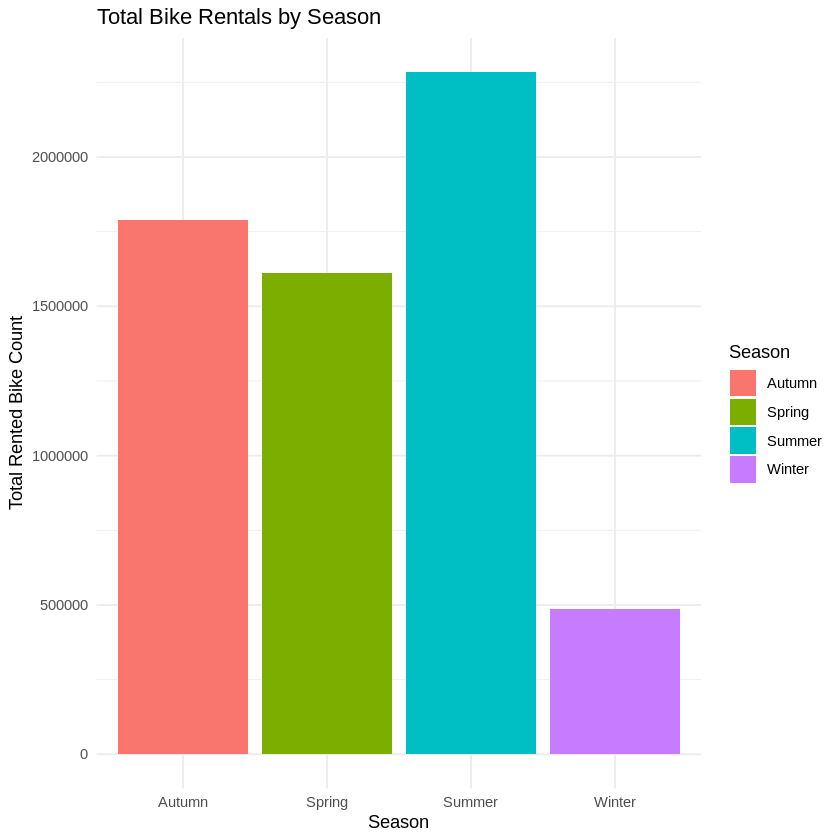

In [ ]:
# Nhóm dữ liệu theo cột 'Seasons' và tóm tắt tổng số lượng xe đạp được thuê
season_summary <- DF %>%
  group_by(seasons) %>%  # Nhóm dữ liệu theo cột 'Seasons'
  summarize(total_rentals = sum(rented_bike_count))  # Tính tổng số lượng xe đạp được thuê cho mỗi mùa

# Vẽ biểu đồ cột cho tổng số lượng xe đạp được thuê theo mùa
ggplot(season_summary, aes(x = factor(seasons), y = total_rentals, fill = factor(seasons))) +
  geom_bar(stat = "identity") +  # Vẽ biểu đồ cột với tổng số lượng xe đạp được thuê
  labs(title = "Total Bike Rentals by Season",  # Đặt tiêu đề cho biểu đồ
       x = "Season",  # Đặt nhãn trục x là "Season"
       y = "Total Rented Bike Count") +  # Đặt nhãn trục y là "Total Rented Bike Count"
  scale_fill_discrete(name = "Season",  # Đặt tên cho chú giải là "Season"
                      labels = c("Autumn", "Spring", "Summer", "Winter")) +  # Đặt nhãn cho các mùa
  theme_minimal()  # Sử dụng giao diện đơn giản cho biểu đồ


`geom_smooth()` using formula = 'y ~ x'


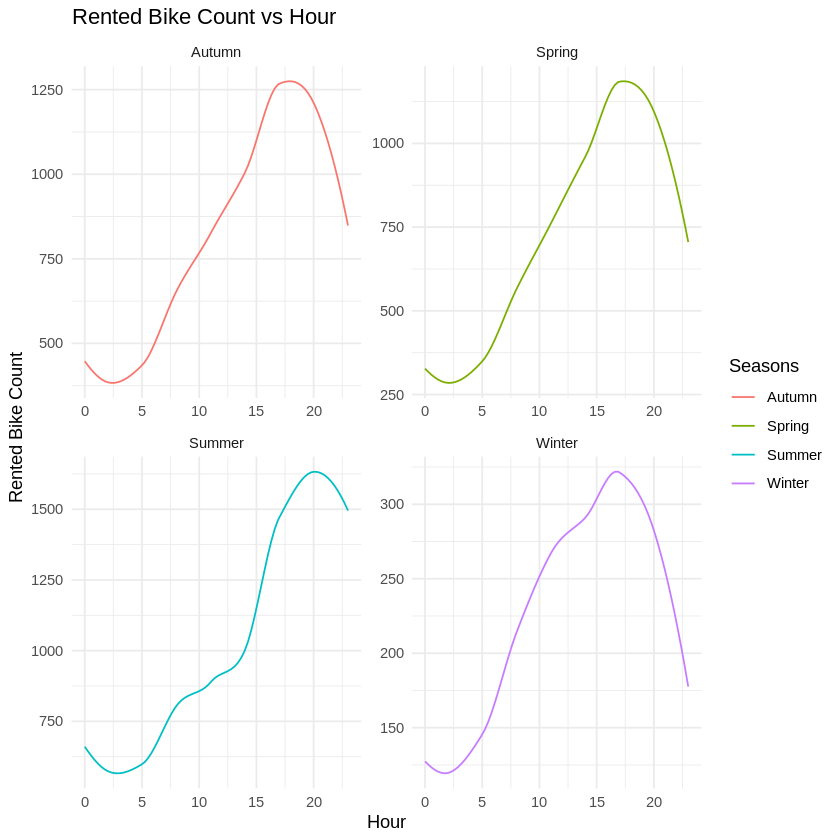

In [ ]:
# Vẽ biểu đồ số lượng xe đạp được thuê theo giờ cho từng mùa
ggplot(DF, aes(x = hour, y = rented_bike_count, color = factor(seasons))) +
  geom_line(stat = "smooth", method = "loess", se = FALSE) +  # Vẽ đường cong trơn (loess) để hiển thị xu hướng số lượng xe đạp được thuê theo giờ
  facet_wrap(~ seasons, scales = "free", ncol = 2) +  # Tạo các biểu đồ nhỏ theo từng mùa, với số cột là 2 và tỷ lệ trục y tự do
  labs(title = "Rented Bike Count vs Hour",  # Đặt tiêu đề cho biểu đồ
       x = "Hour",  # Đặt nhãn trục x là "Hour"
       y = "Rented Bike Count",  # Đặt nhãn trục y là "Rented Bike Count"
       color = "Seasons") +  # Đặt nhãn cho chú giải màu là "Seasons"
  theme_minimal()  # Sử dụng giao diện đơn giản cho biểu đồ


## **Theo quan sát:**
### Mùa Thu
- **Xu hướng:** Số lượng xe đạp thuê bắt đầu thấp vào sáng sớm, tăng dần, đạt đỉnh vào khoảng 17:00 (5 giờ chiều) và sau đó giảm xuống.
- **Đỉnh điểm:** Khoảng 1250 xe đạp thuê vào khoảng 17:00.
- **Mẫu hình:** Số lượng thuê xe cao hơn vào buổi chiều muộn và đầu tối.

### Mùa Xuân
- **Xu hướng:** Số lượng xe đạp thuê bắt đầu thấp vào giờ đầu, tăng mạnh, đạt đỉnh vào khoảng 17:00 và sau đó giảm.
- **Đỉnh điểm:** Khoảng 1000 xe đạp thuê vào khoảng 17:00.
- **Mẫu hình:** Tương tự như Mùa Thu, với số lượng thuê xe cao vào buổi chiều muộn và đầu tối.

### Mùa Hè
- **Xu hướng:** Số lượng xe đạp thuê bắt đầu thấp, tăng dần trong ngày, đạt đỉnh vào khoảng 17:00-18:00 và sau đó giảm nhẹ.
- **Đỉnh điểm:** Khoảng 1500 xe đạp thuê từ 17:00 đến 18:00.
- **Mẫu hình:** Số lượng thuê xe cao nhất so với các mùa khác, với sự gia tăng đáng kể suốt cả ngày.

### Mùa Đông
- **Xu hướng:** Số lượng xe đạp thuê bắt đầu thấp, tăng dần, đạt đỉnh vào khoảng 17:00 và sau đó giảm.
- **Đỉnh điểm:** Khoảng 300 xe đạp thuê vào khoảng 17:00.
- **Mẫu hình:** Mẫu hình tương tự các mùa khác nhưng với số lượng thấp hơn đáng kể.

### Quan sát chung
- **Giờ cao điểm:** Trong tất cả các mùa, thời gian thuê xe cao điểm là khoảng 17:00.
- **Số lượng thuê thấp nhất:** Vào sáng sớm (từ nửa đêm đến khoảng 6:00) thường có số lượng thuê xe thấp nhất.
- **Biến đổi theo mùa:**
  - Mùa Hè có số lượng thuê xe cao nhất, đạt đỉnh khoảng 1500.
  - Mùa Đông có số lượng thuê xe thấp nhất, đạt đỉnh khoảng 300.
  - Mùa Xuân và Mùa Thu có số lượng thuê trung bình, đạt đỉnh khoảng 1000 và 1250 tương ứng.

### Kết luận
- **Sử dụng cao nhất:** Buổi tối mùa hè khoảng 17:00-18:00.
- **Sử dụng thấp nhất:** Buổi sáng sớm trong tất cả các mùa.
- **Thời gian cao điểm nhất quán:** 17:00 là thời gian thuê xe đạp cao điểm nhất trong tất cả các mùa.

In [ ]:
glimpse(DF)

Rows: 8,760
Columns: 14
$ date                    <chr> "01/12/2017", "01/12/2017", "01/12/2017", "01/…
$ rented_bike_count       <int> 254, 204, 173, 107, 78, 100, 181, 460, 930, 49…
$ hour                    <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ temperature_c           <dbl> -5.2, -5.5, -6.0, -6.2, -6.0, -6.4, -6.6, -7.4…
$ humidity_percent        <int> 37, 38, 39, 40, 36, 37, 35, 38, 37, 27, 24, 21…
$ wind_speed_m_s          <dbl> 2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 0.9, 1.1, 0…
$ visibility_10m          <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000…
$ dew_point_temperature_c <dbl> -17.6, -17.6, -17.7, -17.6, -18.6, -18.7, -19.…
$ solar_radiation_mj_m2   <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00…
$ rainfall_mm             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ snowfall_cm             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ seasons                 <chr> "Winter", "Winter", "Winter", "Winter", "Winte…
$ holiday       

**Số lượng thuê xe theo ngày lễ**

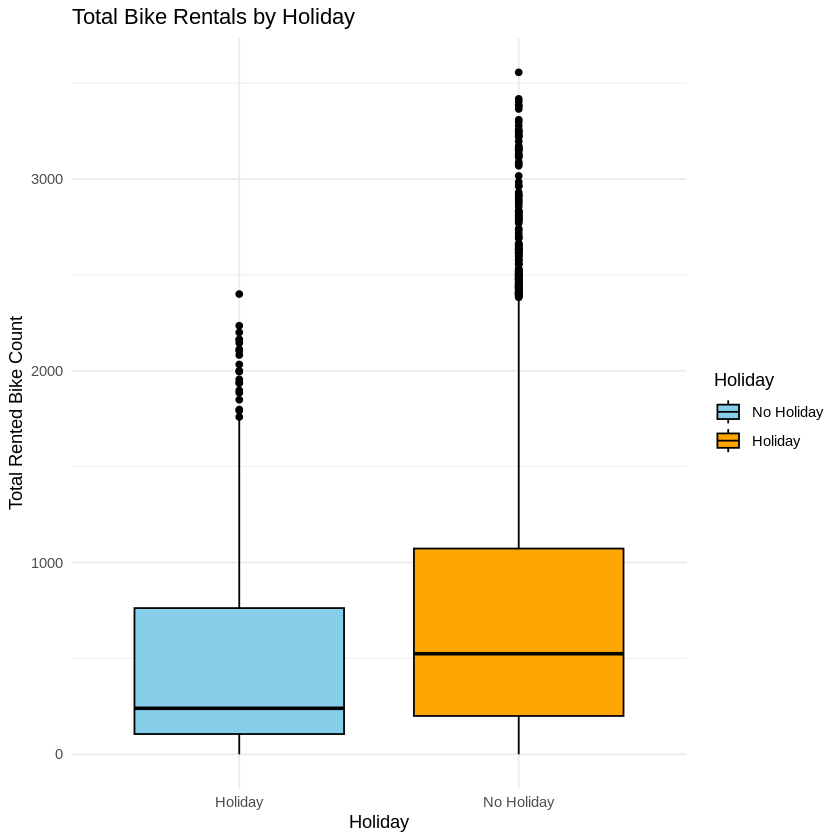

In [ ]:
# Vẽ biểu đồ hộp để hiển thị tổng số lượng xe đạp được thuê theo các ngày lễ và ngày thường
ggplot(DF, aes(x = factor(holiday), y =rented_bike_count, fill = factor(holiday))) +
  geom_boxplot(color = "black") +  # Vẽ biểu đồ hộp với đường viền màu đen
  labs(title = "Total Bike Rentals by Holiday",  # Đặt tiêu đề cho biểu đồ
       x = "Holiday",  # Đặt nhãn trục x là "Holiday"
       y = "Total Rented Bike Count",  # Đặt nhãn trục y là "Total Rented Bike Count"
       fill = "Holiday") +  # Đặt nhãn cho chú giải màu là "Holiday"
  scale_fill_manual(values = c("skyblue", "orange"),  # Đặt màu cho các hộp
                    labels = c("No Holiday", "Holiday")) +  # Đặt nhãn cho các mức của 'Holiday'
  theme_minimal()  # Sử dụng giao diện đơn giản cho biểu đồ



Ngày lễ:

- Trung vị cao hơn (~1000 xe).

- QR rộng hơn (khoảng từ 500 đến 1500 xe).

- Có nhiều điểm ngoại biên với số lượng thuê xe cao vượt trội (trên 3000 xe).

Ngày không phải ngày lễ:

- Trung vị thấp hơn (~500 xe).

- IQR hẹp hơn (khoảng từ 200 đến 800 xe).

- Cũng có điểm ngoại biên nhưng ít hơn và giá trị cao nhất khoảng trên 2000 xe.

Kết luận:

- Ngày lễ có số lượng thuê xe đạp nhiều hơn và biến động nhiều hơn so với ngày không phải ngày lễ.

- Ngày không phải ngày lễ có số lượng thuê xe đạp ít hơn và ổn định hơn.

**Trung bình số lượng thuê xe theo nhiệt độ ngoài trời**

In [ ]:
# Nhóm dữ liệu theo cột 'Seasons' và 'Hour', sau đó tính các thống kê tóm tắt
hourly_seasonal_summary <- DF %>%
  group_by(seasons, hour) %>%  # Nhóm dữ liệu theo cột 'Seasons' và 'Hour'
  summarise(
    Avg_Temperature = mean(temperature_c, na.rm = TRUE),  # Tính nhiệt độ trung bình, bỏ qua các giá trị NA
    Avg_Rented_Bike_Count = mean(rented_bike_count, na.rm = TRUE),  # Tính số lượng xe đạp được thuê trung bình, bỏ qua các giá trị NA
    .groups = 'drop'  # Bỏ nhóm sau khi tính toán xong
  ) %>%
  arrange(desc(Avg_Rented_Bike_Count)) %>%  # Sắp xếp dữ liệu theo số lượng xe đạp được thuê trung bình giảm dần
  slice_head(n = 10)  # Lấy ra 10 dòng đầu tiên

# In ra bảng tóm tắt
print(hourly_seasonal_summary)

# A tibble: 10 × 4
   seasons  hour Avg_Temperature Avg_Rented_Bike_Count
   <chr>   <int>           <dbl>                 <dbl>
 1 Summer     18            29.4                 2135.
 2 Summer     19            28.3                 1889.
 3 Summer     20            27.1                 1802.
 4 Autumn     18            16.3                 1765.
 5 Summer     21            26.3                 1754.
 6 Spring     18            16.0                 1653.
 7 Summer     22            25.7                 1568.
 8 Summer     17            30.1                 1526.
 9 Summer      8            24.5                 1419.
10 Autumn     17            17.6                 1391.


`geom_smooth()` using formula = 'y ~ x'


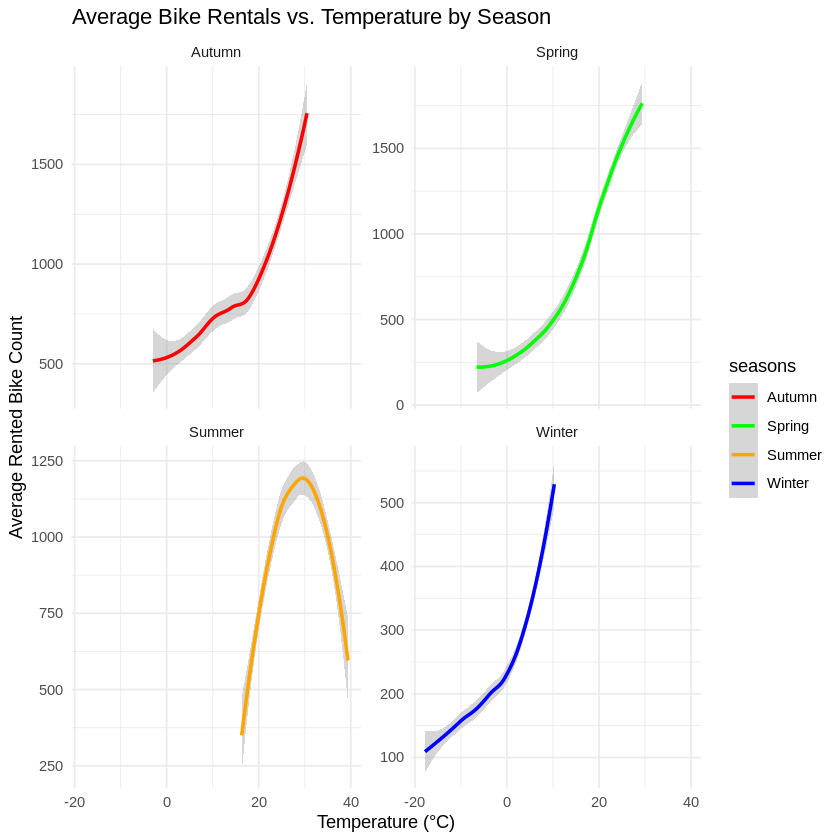

In [ ]:
# Tính số lượng xe đạp được thuê trung bình cho mỗi nhiệt độ và mùa
temp_season_avg <- DF %>%
  group_by(seasons, temperature_c) %>%  # Nhóm dữ liệu theo cột 'Seasons' và 'Temperature(°C)'
  summarize(avg_rentals = mean(rented_bike_count, na.rm = TRUE), .groups = 'drop')  # Tính số lượng xe đạp được thuê trung bình, bỏ qua các giá trị NA

# Tạo biểu đồ đường có làm trơn cho từng mùa
ggplot(temp_season_avg, aes(x = temperature_c, y = avg_rentals, color = seasons)) +
  geom_smooth(method = "loess", se = TRUE) +  # Vẽ đường cong làm trơn (loess) và hiển thị khoảng sai số
  labs(title = "Average Bike Rentals vs. Temperature by Season",  # Đặt tiêu đề cho biểu đồ
       x = "Temperature (°C)",  # Đặt nhãn trục x là "Temperature (°C)"
       y = "Average Rented Bike Count") +  # Đặt nhãn trục y là "Average Rented Bike Count"
  theme_minimal() +  # Sử dụng giao diện đơn giản cho biểu đồ
  scale_color_manual(values = c("Winter" = "blue", "Spring" = "green", "Summer" = "orange", "Autumn" = "red")) +  # Đặt màu sắc cho từng mùa
  facet_wrap(~seasons, scales = "free_y")  # Tạo các biểu đồ nhỏ cho từng mùa, với tỷ lệ trục y tự do



1. **Mùa hè có xu hướng có lượng xe đạp thuê nhiều nhất**:
    - Các khung giờ từ 17h đến 22h trong mùa hè cho thấy lượng xe đạp thuê rất cao, đặc biệt là lúc 18h (2135 xe) và 19h (1889 xe).
    - Điều này có thể được giải thích do thời tiết ấm áp và dễ chịu, làm cho việc đạp xe trở nên hấp dẫn hơn.

2. **Mối quan hệ giữa nhiệt độ trung bình và lượng xe đạp thuê**:
    - Nhìn chung, lượng xe đạp thuê có xu hướng cao khi nhiệt độ trung bình nằm trong khoảng từ 24.5°C đến 30.1°C.
    - Có một sự giảm nhẹ trong lượng xe đạp thuê khi nhiệt độ giảm xuống dưới 17°C, như trong các khung giờ của mùa thu và mùa xuân.

3. **Giờ cao điểm thuê xe đạp**:
    - Các giờ từ 17h đến 22h là giờ cao điểm thuê xe đạp trong mùa hè, với lượng thuê đạt đỉnh vào lúc 18h.
    - Trong mùa thu, giờ cao điểm là 17h và 18h, với lượng xe đạp thuê giảm xuống so với mùa hè.

4. **Sự khác biệt theo mùa**:
    - Mùa hè có lượng xe đạp thuê trung bình cao hơn so với mùa thu và mùa xuân. Điều này có thể do thời tiết tốt hơn và ngày dài hơn trong mùa hè.

5. **Nhiệt độ trung bình của các mùa**:
    - Nhiệt độ trung bình cao nhất vào mùa hè, từ 24.5°C đến 30.1°C.
    - Mùa thu và mùa xuân có nhiệt độ trung bình thấp hơn, từ 16°C đến 17.6°C.


**Số lượng thuê xe theo bức xạ mặt trời**

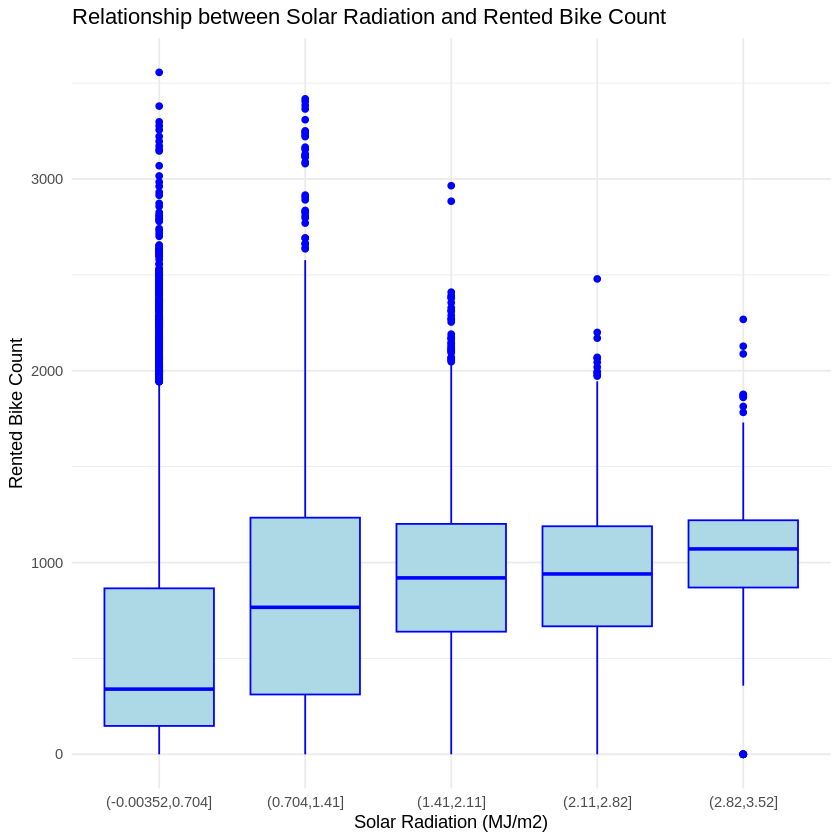

In [ ]:
# Vẽ biểu đồ hộp để khám phá mối quan hệ giữa Bức xạ mặt trời và Số lượng xe đạp được thuê
ggplot(DF, aes(x = cut(solar_radiation_mj_m2, breaks = 5), y = rented_bike_count)) +
  geom_boxplot(fill = "lightblue", color = "blue") +  # Vẽ biểu đồ hộp với màu nền xanh nhạt và viền màu xanh
  labs(title = "Relationship between Solar Radiation and Rented Bike Count",  # Đặt tiêu đề cho biểu đồ
       x = "Solar Radiation (MJ/m2)",  # Đặt nhãn trục x là "Solar Radiation (MJ/m2)"
       y = "Rented Bike Count") +  # Đặt nhãn trục y là "Rented Bike Count"
  theme_minimal()  # Sử dụng giao diện đơn giản cho biểu đồ


**Biểu đồ tương quan**

In [ ]:
glimpse(DF)

Rows: 8,760
Columns: 14
$ date                    <chr> "01/12/2017", "01/12/2017", "01/12/2017", "01/…
$ rented_bike_count       <int> 254, 204, 173, 107, 78, 100, 181, 460, 930, 49…
$ hour                    <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ temperature_c           <dbl> -5.2, -5.5, -6.0, -6.2, -6.0, -6.4, -6.6, -7.4…
$ humidity_percent        <int> 37, 38, 39, 40, 36, 37, 35, 38, 37, 27, 24, 21…
$ wind_speed_m_s          <dbl> 2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 0.9, 1.1, 0…
$ visibility_10m          <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000…
$ dew_point_temperature_c <dbl> -17.6, -17.6, -17.7, -17.6, -18.6, -18.7, -19.…
$ solar_radiation_mj_m2   <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00…
$ rainfall_mm             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ snowfall_cm             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ seasons                 <chr> "Winter", "Winter", "Winter", "Winter", "Winte…
$ holiday       

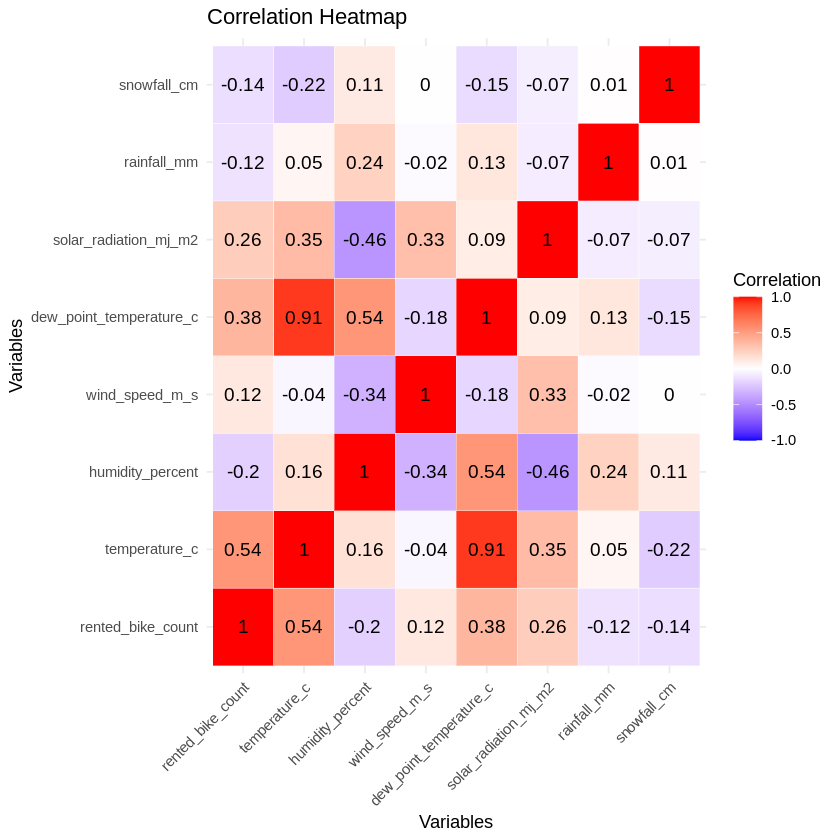

In [ ]:
# Tính ma trận tương quan
correlations <- cor(DF %>% select(rented_bike_count, temperature_c, humidity_percent, wind_speed_m_s,
                                  dew_point_temperature_c, solar_radiation_mj_m2, rainfall_mm, snowfall_cm))


# Chuyển đổi ma trận tương quan thành dạng dài để vẽ bằng ggplot
cor_df <- melt(correlations)

# Vẽ biểu đồ heatmap bằng ggplot2
ggplot(cor_df, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +  # Vẽ các ô vuông trong biểu đồ heatmap
  geom_text(aes(label = round(value, 2)), size = 4) +  # Hiển thị giá trị tương quan trên heatmap với hai chữ số thập phân
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1, 1), space = "Lab",
                       name = "Correlation") +  # Đặt màu sắc từ xanh đến đỏ cho heatmap
  theme_minimal() +  # Sử dụng giao diện đơn giản cho biểu đồ
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Điều chỉnh góc và vị trí chữ trên trục x
  labs(title = "Correlation Heatmap",  # Đặt tiêu đề cho biểu đồ
       x = "Variables", y = "Variables")  # Đặt nhãn cho trục x và y


## Chiến Lược Kinh Doanh Cho Dịch Vụ Cho Thuê Xe Đạp Qua Trực Quan hóa

### 1. Tối Ưu Hóa Nguồn Cung

- **Điều Chỉnh Theo Mùa:** Tăng cường cung cấp xe đạp vào mùa hè khi có lượng thuê cao nhất, đặc biệt vào các giờ cao điểm từ 17:00 đến 19:00.
  
- **Giám Sát Thời Tiết:** Điều chỉnh cung cấp xe đạp dựa trên dự báo thời tiết. Đáp ứng nhu cầu gia tăng vào những ngày nắng đẹp và giảm cung vào ngày mưa hoặc lạnh.

### 2. Chiến Lược Vận Hành Hiệu Quả

- **Tối Ưu Giờ Hoạt Động:** Tăng cường nhân viên và xe đạp trong các khung giờ cao điểm từ 17:00 đến 19:00, đảm bảo khả năng phục vụ tối đa vào thời gian này.

- **Điều Chỉnh Bảo Trì:** Lên kế hoạch bảo trì xe đạp vào các khung giờ ít thuê hơn, như sáng sớm và đêm khuya.

### 3. Chiến Dịch Tiếp Thị và Khuyến Mãi

- **Tiếp Thị Địa Phương:** Tập trung vào các khu vực có nhu cầu thuê cao như trung tâm thành phố và các khu vực công cộng.

- **Khuyến Mãi Đặc Biệt:** Cung cấp giảm giá hoặc chương trình khuyến mãi vào các ngày đặc biệt như ngày lễ và cuối tuần để thu hút khách hàng.

### 4. Cải Thiện Dịch Vụ

- **Phản Hồi Khách Hàng:** Thu thập phản hồi để cải thiện dịch vụ và đáp ứng tốt hơn nhu cầu của khách hàng.

- **Mở Rộng Mạng Lưới Trạm Xe Đạp:** Xây dựng thêm các trạm xe đạp ở các khu vực có nhu cầu tiềm năng dựa trên phân tích dữ liệu thuê.

### 5. Quản Lý Dựa Trên Dữ Liệu

- **Giám Sát Thời Gian Thực:** Sử dụng dữ liệu để giám sát và dự đoán nhu cầu thuê xe đạp, điều chỉnh chiến lược kinh doanh theo thời gian thực.

- **Đánh Giá Hiệu Quả:** Đánh giá và điều chỉnh chiến lược dựa trên các số liệu về lượng thuê và phản hồi từ khách hàng.


# 6. Mô hình

Biến phụ thuộc là biến đếm: Rented Bike Count là biến mục tiêu đếm số lượng xe đạp được thuê trong một khoảng thời gian cụ thể. Mô hình Poisson thích hợp để mô hình hóa các biến mục tiêu có phân phối Poisson, trong đó giá trị của biến là các số nguyên không âm và phân phối đều.

Phân phối của dữ liệu: Dữ liệu về số lượng xe đạp được thuê thường có phân phối dương tính (skewed right) và không phải là phân phối chuẩn. Mô hình Poisson là lựa chọn phù hợp cho dữ liệu có phân phối như vậy, vì nó mô tả các biến ngẫu nhiên có giá trị dương và có tính chất đếm được.

Các biến độc lập: Các biến Temperature(°C), Humidity(%), Wind speed (m/s), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), và Snowfall (cm) có thể ảnh hưởng đến số lượng xe đạp được thuê dưới dạng các yếu tố quan trọng. Mô hình Poisson có thể mô tả tương quan giữa các biến độc lập này và biến phụ thuộc một cách hiệu quả.

Liên quan giữa giá trị trung bình và phương sai: Mô hình Poisson giả định rằng giá trị kỳ vọng (mean) và phương sai (variance) của biến phụ thuộc bằng nhau (đồng phương sai). Trong trường hợp các biến độc lập không tạo ra hiệu ứng bất thường (overdispersion), mô hình Poisson sẽ phù hợp.

In [ ]:
glimpse(encoded_data)

Rows: 8,760
Columns: 14
$ date                    <chr> "01/12/2017", "01/12/2017", "01/12/2017", "01/…
$ rented_bike_count       <int> 254, 204, 173, 107, 78, 100, 181, 460, 930, 49…
$ hour                    <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ temperature_c           <dbl> -5.2, -5.5, -6.0, -6.2, -6.0, -6.4, -6.6, -7.4…
$ humidity_percent        <int> 37, 38, 39, 40, 36, 37, 35, 38, 37, 27, 24, 21…
$ wind_speed_m_s          <dbl> 2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 0.9, 1.1, 0…
$ visibility_10m          <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000…
$ dew_point_temperature_c <dbl> -17.6, -17.6, -17.7, -17.6, -18.6, -18.7, -19.…
$ solar_radiation_mj_m2   <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00…
$ rainfall_mm             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ snowfall_cm             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ seasons                 <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ holiday       

**Chuẩn bị data vào mô hình**

In [ ]:
encoded_data <- encoded_data %>%filter(functioning_day == 1)
encoded_data <- encoded_data %>% select(-functioning_day,-date)

In [ ]:
set.seed(7)

# Chia dữ liệu thành train và test (vd: tỷ lệ 70-30)
train_index <- sample(1:nrow(encoded_data), 0.7 * nrow(encoded_data))
train_data <- encoded_data[train_index, ]
#Chuẩn hóa dữ liệu ở train_data
train_data <- as.data.frame(scale(train_data))
test_data <- encoded_data[-train_index, ]

In [ ]:
# Perform an independent cor-test
cor.test(encoded_data$dew_point_temperature_c, encoded_data$temperature_c)


	Pearson's product-moment correlation

data:  encoded_data$dew_point_temperature_c and encoded_data$temperature_c
t = 207.89, df = 8463, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9109092 0.9178887
sample estimates:
     cor 
0.914467 


**Nhận xét**

Vì cor 2 biến dew_point_temperature_c và temperature_c là 91 nên 2 biến đó có sự tương tác với nhau

Vì các biến hour, seasons, holiday là các biến phân loại

In [ ]:
model <- glm(rented_bike_count ~ humidity_percent + wind_speed_m_s +
               temperature_c + dew_point_temperature_c +
               temperature_c * dew_point_temperature_c +
               solar_radiation_mj_m2 + rainfall_mm + snowfall_cm +
               factor(hour) + factor(seasons) + factor(holiday),
             data = encoded_data, family = poisson)


In [ ]:
# Tóm tắt mô hình
summary(model)


Call:
glm(formula = rented_bike_count ~ humidity_percent + wind_speed_m_s + 
    temperature_c + dew_point_temperature_c + temperature_c * 
    dew_point_temperature_c + solar_radiation_mj_m2 + rainfall_mm + 
    snowfall_cm + factor(hour) + factor(seasons) + factor(holiday), 
    family = poisson, data = encoded_data)

Coefficients:
                                        Estimate Std. Error  z value Pr(>|z|)
(Intercept)                            6.962e+00  7.888e-03  882.591  < 2e-16
humidity_percent                      -1.782e-02  8.488e-05 -209.913  < 2e-16
wind_speed_m_s                        -3.495e-03  4.824e-04   -7.246 4.28e-13
temperature_c                         -7.084e-04  2.941e-04   -2.409   0.0160
dew_point_temperature_c                6.031e-02  3.231e-04  186.682  < 2e-16
solar_radiation_mj_m2                  2.818e-02  1.001e-03   28.146  < 2e-16
rainfall_mm                           -5.369e-01  2.214e-03 -242.527  < 2e-16
snowfall_cm                           -

In [ ]:
# Truy cập các hệ số của mô hình
coef_str  = coef(model)
print(coef_str)

                          (Intercept)                      humidity_percent 
                         6.9618757353                         -0.0178179200 
                       wind_speed_m_s                         temperature_c 
                        -0.0034953487                         -0.0007083767 
              dew_point_temperature_c                 solar_radiation_mj_m2 
                         0.0603080169                          0.0281798383 
                          rainfall_mm                           snowfall_cm 
                        -0.5369433004                         -0.1165784290 
                        factor(hour)1                         factor(hour)2 
                        -0.2247358343                         -0.5456125983 
                        factor(hour)3                         factor(hour)4 
                        -0.9152567475                         -1.3459306692 
                        factor(hour)5                         factor(hour)6 

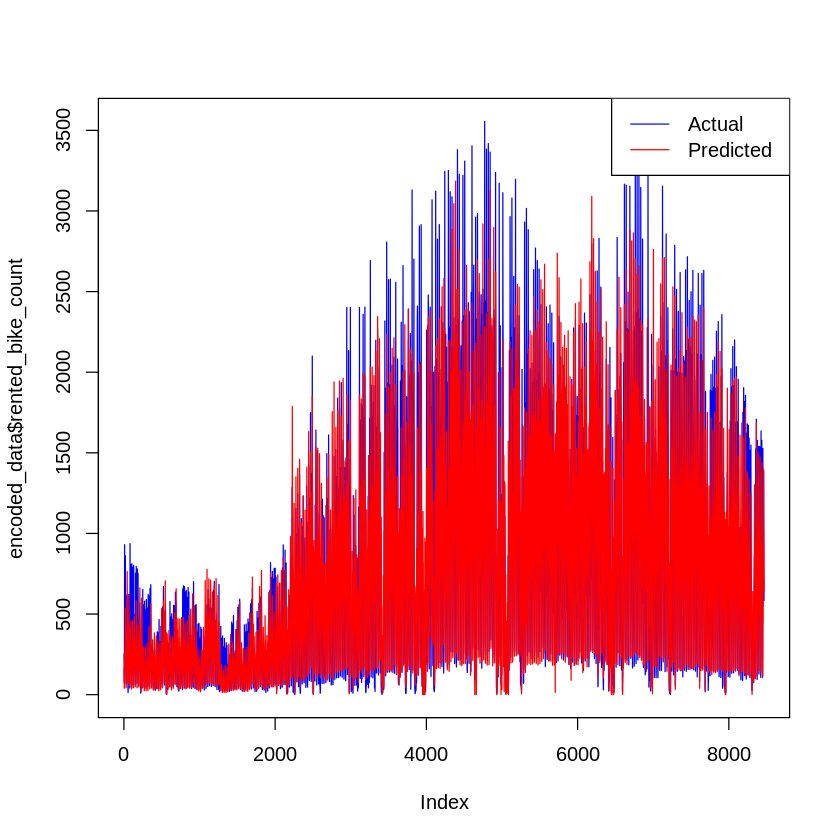

In [ ]:
# Dự đoán số lượng xe đạp dựa trên mô hình
predictions <- predict(model, type = "response")

# Vẽ biểu đồ so sánh dữ liệu thực và dự đoán
plot(encoded_data$rented_bike_count, type = "l", col = "blue", ylim = c(0, max(encoded_data$rented_bike_count, predictions)))
lines(predictions, col = "red")
legend("topright", legend = c("Actual", "Predicted"), col = c("blue", "red"), lty = 1)

# 7. Đánh giá mô hình


Để đánh giá hiệu quả của một mô hình hồi quy, chúng ta sử dụng một số phương pháp thống kê để đánh giá sự phù hợp giữa dự đoán của mô hình và dữ liệu thực tế. Các phương pháp này cung cấp những chỉ số quan trọng để đánh giá và so sánh các mô hình khác nhau.

**Mean Squared Error (MSE)** là một trong những phương pháp đầu tiên được sử dụng để đo lường sai số bình phương trung bình giữa giá trị dự đoán và giá trị quan sát thực tế. MSE càng thấp thì mô hình càng chính xác với dữ liệu thực tế.

**Root Mean Squared Error (RMSE)** là căn bậc hai của MSE, cung cấp một chỉ số sai số trung bình gốc giữa dự đoán và giá trị quan sát thực tế. RMSE cũng càng thấp thì mô hình càng chính xác.

**R-squared (Coefficient of Determination)** là một độ đo thống kê cho thấy mức độ phù hợp của mô hình với dữ liệu. Giá trị R-squared càng gần 1 thì mô hình càng phù hợp với dữ liệu quan sát.

Các biểu đồ như **Residuals vs Fitted Plot** và **Normal Q-Q Plot** cũng được sử dụng để kiểm tra tính tuyến tính và phân phối của phần dư từ mô hình. Biểu đồ **Cook's Distance** giúp xác định các quan sát có ảnh hưởng lớn đến mô hình.


In [ ]:
# Dự đoán số lượng xe đạp thuê trên tập kiểm tra
predicted_counts <- predict(model, newdata = test_data, type = "response")

# Đánh giá mô hình (ví dụ: Mean Squared Error - MSE)
actual_counts <- test_data$rented_bike_count
mse <- mean((predicted_counts - actual_counts)^2)

# In ra MSE
print(paste("Mean Squared Error:", mse))

[1] "Mean Squared Error: 89493.5299522745"


In [ ]:
# Tính RMSE
rmse <- sqrt(mean((predicted_counts - actual_counts)^2))
print(paste("Root Mean Squared Error:", rmse))

[1] "Root Mean Squared Error: 299.154692345406"


In [ ]:
# Tính R-squared
SS_residual <- sum((actual_counts - predicted_counts)^2)
SS_total <- sum((actual_counts - mean(actual_counts))^2)
r_squared <- 1 - (SS_residual / SS_total)
print(paste("R-squared:", r_squared))

[1] "R-squared: 0.787329481373895"


Dựa trên kết quả thu được có thể thấy RMSE và MSE khá cao, khoảng cách giữa đường hồi quy với các điểm dữ liệu còn khá lớn. Đồng thời giá trị R2 khoảng 0.79 tương ứng với giải thích được 79% phương sai dữ liệu.

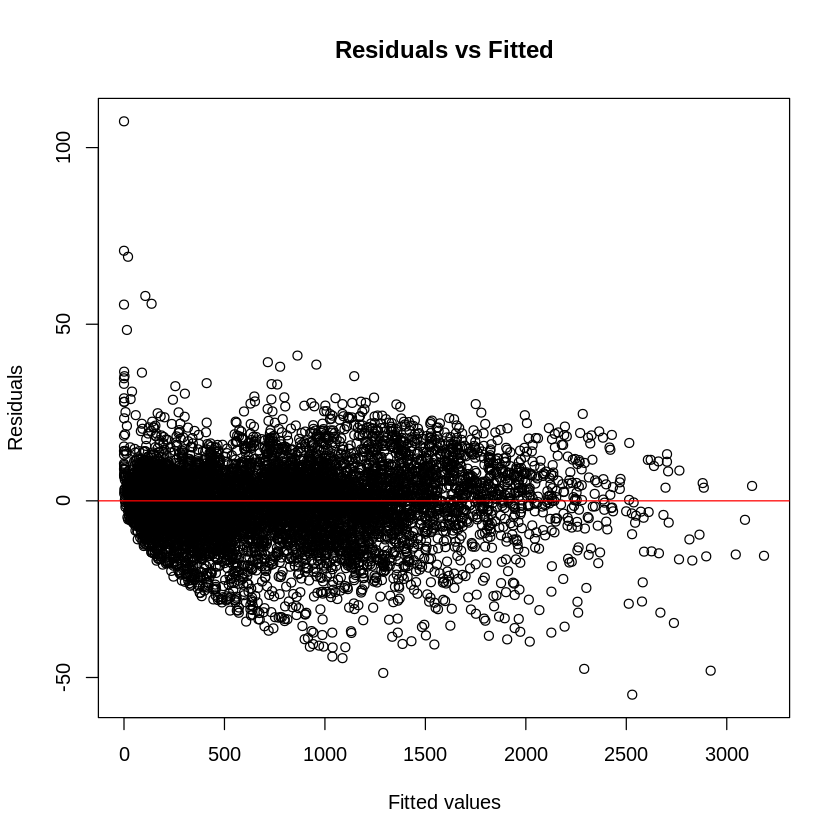

In [ ]:
# Kiểm tra tuyến tính
# Tính toán phần dư
residuals <- residuals(model)

# Biểu đồ Residuals vs Fitted
plot(predictions, residuals,
     xlab = "Fitted values",
     ylab = "Residuals",
     main = "Residuals vs Fitted")
abline(h = 0, col = "red")  # Đường mốc 0 để dễ dàng quan sát sự phân bố của residuals

Biểu đồ phần dư và giá trị dự đoán của mô hình hồi quy cho thấy phần dư phân tán ngẫu nhiên xung quanh trục ngang, cho thấy mô hình phù hợp với dữ liệu một cách tương đối tốt. Tuy nhiên, có sự biến thiên không đồng đều của phần dư theo giá trị dự đoán, và một số điểm ngoại lai xuất hiện, cho thấy mô hình có thể cần điều chỉnh để cải thiện khả năng dự đoán và xử lý các điểm dữ liệu đặc biệt này.

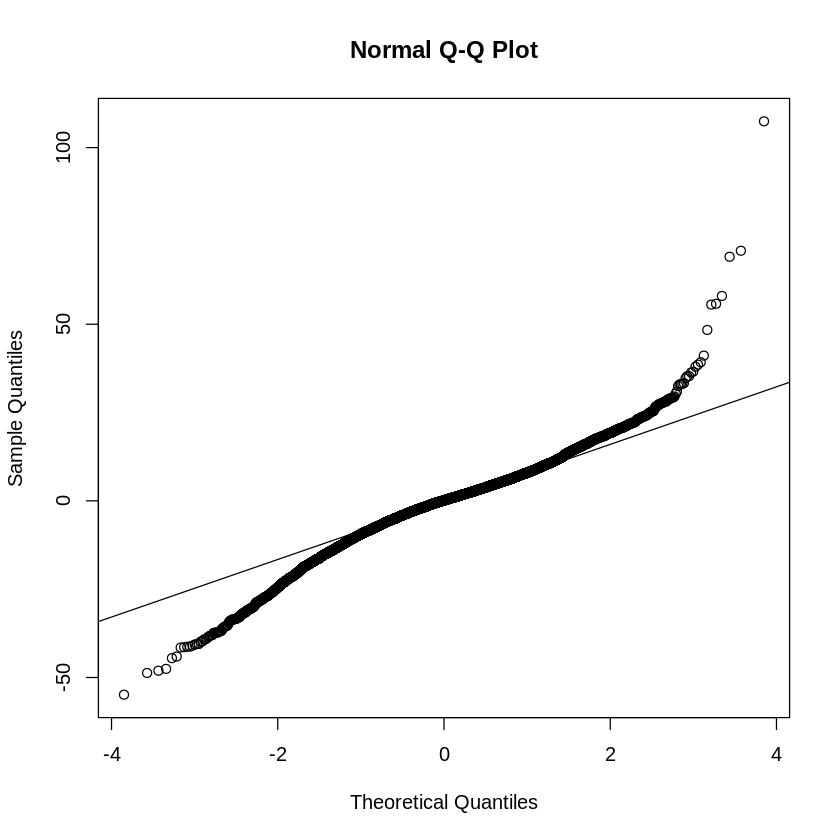

In [ ]:
# Biểu đồ QQ của phần dư
qqnorm(residuals)
qqline(residuals)


Biểu đồ Q-Q chuẩn cho thấy dữ liệu trong phần trung tâm xấp xỉ phân phối chuẩn, nhưng có sự lệch đáng kể ở các đuôi và sự hiện diện của các giá trị ngoại lai. Điều này chỉ ra rằng dữ liệu có thể không hoàn toàn tuân theo phân phối chuẩn, đặc biệt là ở các phần cực

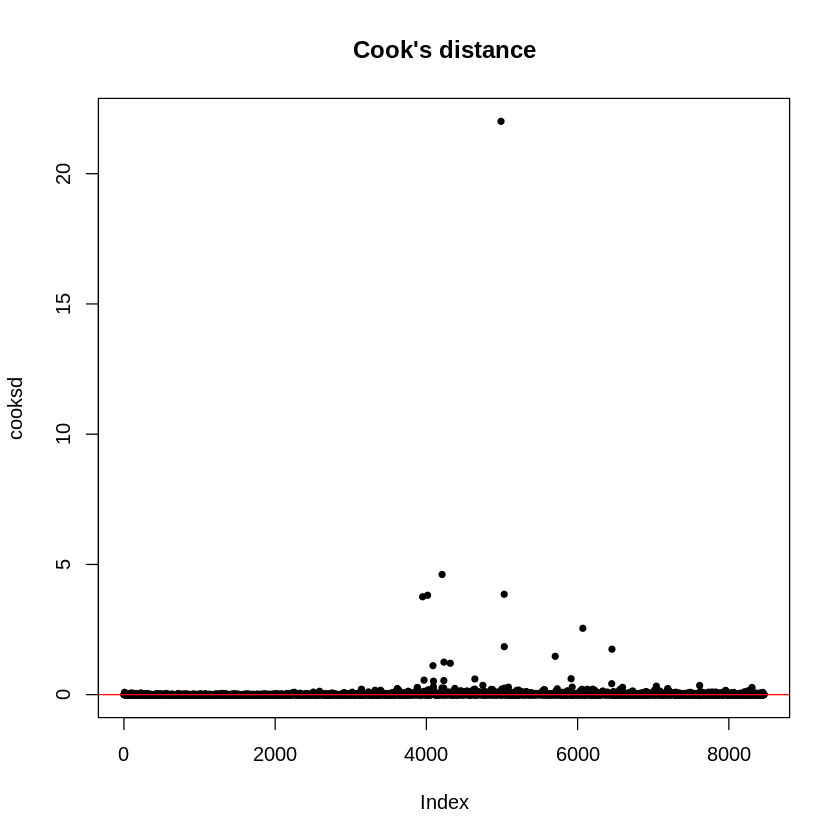

In [ ]:
# Tính Cook's distance
cooksd <- cooks.distance(model)

# Biểu đồ Cook's distance
plot(cooksd, pch = 20, main = "Cook's distance")
abline(h = 4/length(encoded_data$rented_bike_count), col = "red")  # Đường ngưỡng thông thường

Dữ liệu có khá ít điểm ngoài đường thẳng vì vậy đã ảnh hưởng không lớn đến độ chính xác của mô hình.

# 8. Mở rộng mô hình

In [ ]:
glimpse(encoded_data)

Rows: 8,465
Columns: 12
$ rented_bike_count       <int> 254, 204, 173, 107, 78, 100, 181, 460, 930, 49…
$ hour                    <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ temperature_c           <dbl> -5.2, -5.5, -6.0, -6.2, -6.0, -6.4, -6.6, -7.4…
$ humidity_percent        <int> 37, 38, 39, 40, 36, 37, 35, 38, 37, 27, 24, 21…
$ wind_speed_m_s          <dbl> 2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 0.9, 1.1, 0…
$ visibility_10m          <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000…
$ dew_point_temperature_c <dbl> -17.6, -17.6, -17.7, -17.6, -18.6, -18.7, -19.…
$ solar_radiation_mj_m2   <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00…
$ rainfall_mm             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ snowfall_cm             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ seasons                 <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ holiday                 <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


## 8.1 Mô hình Weighted Regression

In [ ]:
# Giả sử weights là vector chứa các trọng số cho mỗi quan sát
weights <- rep(1, nrow(encoded_data))  # Thay đổi weights theo yêu cầu thực tế

# Thực hiện hồi quy có trọng số
weighted_model <- lm(rented_bike_count ~   humidity_percent + wind_speed_m_s +
                       temperature_c * dew_point_temperature_c + solar_radiation_mj_m2 + rainfall_mm + snowfall_cm +
                       factor(hour) + factor(seasons) + factor(holiday),
                     data = encoded_data, weights = weights)

summary(weighted_model)



Call:
lm(formula = rented_bike_count ~ humidity_percent + wind_speed_m_s + 
    temperature_c * dew_point_temperature_c + solar_radiation_mj_m2 + 
    rainfall_mm + snowfall_cm + factor(hour) + factor(seasons) + 
    factor(holiday), data = encoded_data, weights = weights)

Residuals:
    Min      1Q  Median      3Q     Max 
-1367.9  -219.2   -16.3   200.9  1895.5 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                           1112.64451   81.67011  13.624  < 2e-16
humidity_percent                       -12.43285    0.88757 -14.008  < 2e-16
wind_speed_m_s                           6.12153    4.65069   1.316 0.188122
temperature_c                            4.46077    3.28219   1.359 0.174157
dew_point_temperature_c                 24.92117    3.49737   7.126 1.12e-12
solar_radiation_mj_m2                   80.12352   10.00291   8.010 1.30e-15
rainfall_mm                            -59.56925    3.78146 -15.753  < 2e-16


- **Hiệu suất mô hình**:
  - Residual standard error: 372.1
  - Multiple R-squared: 0.6659
  - Adjusted R-squared: 0.6645
  - F-statistic: 480, p-value: < 2.2e-16

- **Ý nghĩa các biến**:
  - Các biến quan trọng: `hour`, `temperature_c`, `humidity_percent`, `solar_radiation_mj_m2`, `rainfall_mm`, `seasons`, `holiday`.
  - Các biến `visibility_10m`, `dew_point_temperature_c` có p-value cao, cho thấy chúng có ảnh hưởng ít đến biến phụ thuộc.

- **Tổng quan**:
  - Mô hình này cho thấy rằng các yếu tố như `hour`, `temperature_c`, `humidity_percent`, và `solar_radiation_mj_m2` có ảnh hưởng đáng kể đến số lượng xe đạp thuê.
  - Tuy nhiên, chỉ số R-squared cũng chấp nhận (0.6659), có thể chỉ ra rằng mô hình chưa giải thích hết sự biến động của dữ liệu.

## 8.2 Mô hình Polynomial Regression

In [ ]:
# Mở rộng biến temperature_c thành đa thức bậc 2
encoded_data$temperature_c2 <- encoded_data$temperature_c^2

# Thực hiện hồi quy đa thức bậc 2
polynomial_model <- lm(rented_bike_count ~   humidity_percent + wind_speed_m_s +
                       temperature_c * dew_point_temperature_c + solar_radiation_mj_m2 + rainfall_mm + snowfall_cm +
                       factor(hour) + factor(seasons) + factor(holiday),
                     data = encoded_data)

summary(polynomial_model)



Call:
lm(formula = rented_bike_count ~ humidity_percent + wind_speed_m_s + 
    temperature_c * dew_point_temperature_c + solar_radiation_mj_m2 + 
    rainfall_mm + snowfall_cm + factor(hour) + factor(seasons) + 
    factor(holiday), data = encoded_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1367.9  -219.2   -16.3   200.9  1895.5 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                           1112.64451   81.67011  13.624  < 2e-16
humidity_percent                       -12.43285    0.88757 -14.008  < 2e-16
wind_speed_m_s                           6.12153    4.65069   1.316 0.188122
temperature_c                            4.46077    3.28219   1.359 0.174157
dew_point_temperature_c                 24.92117    3.49737   7.126 1.12e-12
solar_radiation_mj_m2                   80.12352   10.00291   8.010 1.30e-15
rainfall_mm                            -59.56925    3.78146 -15.753  < 2e-16
snowfall_cm        

- **Hiệu suất mô hình**:
  - Residual standard error: 372.1
  - Multiple R-squared: 0.6659
  - Adjusted R-squared: 0.6645
  - F-statistic: 480 , p-value: < 2.2e-16

- **Ý nghĩa các biến**:
  - Các biến quan trọng: `hour`, `temperature_c`, `temperature_c2`, `humidity_percent`, `solar_radiation_mj_m2`, `rainfall_mm`, `seasons`, `holiday`.
  - Biến `temperature_c2` có ý nghĩa, cho thấy mối quan hệ phi tuyến giữa `temperature_c` và `rented_bike_count`.

- **Tổng quan**:
  - Việc thêm biến bình phương của `temperature_c` giúp cải thiện mô hình một chút (tăng nhẹ chỉ số R-squared).
  - Mô hình này cũng cho thấy sự hiện diện của mối quan hệ phi tuyến giữa nhiệt độ và số lượng xe đạp thuê.


## 8.3 Mô hình Bsplines

In [ ]:
# Sử dụng B-Spline bậc 3 cho biến temperature_c
b_spline_model <- lm(rented_bike_count ~ factor(hour) + bs(temperature_c, degree = 3) + humidity_percent +
    wind_speed_m_s + visibility_10m + dew_point_temperature_c +
    solar_radiation_mj_m2 + rainfall_mm + snowfall_cm + factor(seasons) + factor(holiday),
    data = encoded_data)

summary(b_spline_model)


Call:
lm(formula = rented_bike_count ~ factor(hour) + bs(temperature_c, 
    degree = 3) + humidity_percent + wind_speed_m_s + visibility_10m + 
    dew_point_temperature_c + solar_radiation_mj_m2 + rainfall_mm + 
    snowfall_cm + factor(seasons) + factor(holiday), data = encoded_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1439.64  -219.54    -9.12   202.17  2046.98 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     1.278e+03  1.339e+02   9.543  < 2e-16 ***
factor(hour)1                  -1.077e+02  2.701e+01  -3.987 6.74e-05 ***
factor(hour)2                  -2.199e+02  2.703e+01  -8.135 4.69e-16 ***
factor(hour)3                  -3.068e+02  2.705e+01 -11.342  < 2e-16 ***
factor(hour)4                  -3.701e+02  2.706e+01 -13.679  < 2e-16 ***
factor(hour)5                  -3.592e+02  2.710e+01 -13.254  < 2e-16 ***
factor(hour)6                  -1.916e+02  2.712e+01  -7.066 1.72e-12 ***


- **Hiệu suất mô hình**:
  - Residual standard error: 358.1
  - Multiple R-squared: 0.6906
  - Adjusted R-squared: 0.6892
  - F-statistic: 508.3, p-value: < 2.2e-16

- **Ý nghĩa các biến**:
  - Các biến quan trọng: `hour`, `bs(temperature_c, degree = 3)`, `humidity_percent`, `solar_radiation_mj_m2`, `rainfall_mm`, `seasons`, `holiday`.
  - Các spline cho thấy sự phức tạp và linh hoạt hơn trong mô hình, cho phép mô hình hóa mối quan hệ phi tuyến giữa `hour` và `temperature_c` với `rented_bike_count`.

- **Tổng quan**:
  - Mô hình với các spline bậc 3 cải thiện hiệu suất mô hình (chỉ số R-squared cao hơn) và thể hiện tốt hơn sự phức tạp của dữ liệu.
  - Tuy nhiên, việc sử dụng spline có thể làm cho mô hình phức tạp hơn và khó giải thích hơn.

## 8.4 Mô hình GAM

In [ ]:
# Sử dụng GAM cho mô hình dự đoán số lượng xe đạp thuê
gam_model <- gam(rented_bike_count ~ factor(hour)  + s(humidity_percent) +
    s(wind_speed_m_s) + s(visibility_10m) + s(dew_point_temperature_c*temperature_c) +
    s(solar_radiation_mj_m2) + s(rainfall_mm) + s(snowfall_cm) + factor(seasons) + factor(holiday),
    data = encoded_data)

summary(gam_model)


Warning message in term[i] <- attr(terms(reformulate(term[i])), "term.labels"):
“number of items to replace is not a multiple of replacement length”



Family: gaussian 
Link function: identity 

Formula:
rented_bike_count ~ factor(hour) + s(humidity_percent) + s(wind_speed_m_s) + 
    s(visibility_10m) + s(dew_point_temperature_c * temperature_c) + 
    s(solar_radiation_mj_m2) + s(rainfall_mm) + s(snowfall_cm) + 
    factor(seasons) + factor(holiday)

Parametric coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       684.460     25.041  27.334  < 2e-16 ***
factor(hour)1    -110.959     25.557  -4.342 1.43e-05 ***
factor(hour)2    -221.990     25.597  -8.672  < 2e-16 ***
factor(hour)3    -296.458     25.635 -11.565  < 2e-16 ***
factor(hour)4    -372.125     25.673 -14.495  < 2e-16 ***
factor(hour)5    -356.496     25.741 -13.849  < 2e-16 ***
factor(hour)6    -192.618     25.762  -7.477 8.39e-14 ***
factor(hour)7       3.656     26.550   0.138    0.890    
factor(hour)8     243.072     28.450   8.544  < 2e-16 ***
factor(hour)9    -308.361     31.316  -9.847  < 2e-16 ***
factor(hour)10   -566.731     

- **Hiệu suất mô hình**:
  - R-squared (adj): 0.722
  - Deviance explained: 72.5%
  - GCV (Generalized Cross-Validation): 1.1571e+05
  - Scale est.: 1.1465e+05

- **Ý nghĩa các biến**:
  - Các biến quan trọng: `s(temperature_c)`, `s(humidity_percent)`, `s(wind_speed_m_s)`, `s(visibility_10m)`, `s(dew_point_temperature_c)`, `s(solar_radiation_mj_m2)`, `s(rainfall_mm)`, `factor(hour)`, `factor(seasons)`, `factor(holiday)`.
  - Các hàm trơn (`s()`) cho thấy mô hình có khả năng nắm bắt mối quan hệ phi tuyến giữa các biến dự đoán và biến phụ thuộc một cách linh hoạt hơn.

- **Tổng quan**:
  - Mô hình GAM cung cấp hiệu suất cao nhất trong các mô hình được thử nghiệm với chỉ số R-squared cao hơn.
  - Mô hình này rất linh hoạt và có khả năng nắm bắt các mối quan hệ phi tuyến giữa các biến một cách tốt hơn so với các mô hình tuyến tính và spline bậc 3.
  - Tuy nhiên, mô hình GAM cũng phức tạp hơn và khó giải thích hơn, đặc biệt là khi phải xem xét các hàm trơn của các biến dự đoán.


# 9. Tìm hiểu thêm

Do các kết quả của metric của các mô hình hồi quy bên trên không quá cao nên nhóm chúng em có tìm hiểu thêm và đề xuất sử dụng một mô hình khác cho bài toán này.

Random Forest là một thuật toán học máy phổ biến trong lĩnh vực phân loại và hồi quy. Đây là một phương pháp dựa trên cây quyết định (decision trees), nơi mà một loạt các cây quyết định được xây dựng và kết hợp lại với nhau để tạo thành một "rừng" cây quyết định.

### Đặc điểm chính của Random Forest:

1. **Phương pháp tổ hợp (Ensemble Method)**: Random Forest kết hợp nhiều cây quyết định để cải thiện độ chính xác và giảm thiểu overfitting.

2. **Ngẫu nhiên (Randomization)**: Trong quá trình xây dựng mỗi cây quyết định, Random Forest sử dụng một số lượng mẫu ngẫu nhiên từ tập dữ liệu huấn luyện và một số lượng ngẫu nhiên các đặc trưng để xây dựng cây, từ đó giảm thiểu sự phụ thuộc quá mức vào dữ liệu huấn luyện.

3. **Làm việc tốt với dữ liệu lớn và nhiễu**: Random Forest thường cho kết quả tốt khi làm việc với các bộ dữ liệu lớn, có nhiễu và số lượng đặc trưng lớn.

4. **Độ tin cậy cao**: Do kết quả được dựa trên nhiều cây quyết định, nên Random Forest có khả năng đưa ra dự đoán đáng tin cậy hơn so với một cây quyết định đơn lẻ.

5. **Khả năng xử lý cả hai loại bài toán**: Random Forest có thể được áp dụng cho cả bài toán phân loại và hồi quy.




In [ ]:
colnames(encoded_data)

[1] "rented_bike_count"       "hour"                   
 [3] "temperature_c"           "humidity_percent"       
 [5] "wind_speed_m_s"          "visibility_10m"         
 [7] "dew_point_temperature_c" "solar_radiation_mj_m2"  
 [9] "rainfall_mm"             "snowfall_cm"            
[11] "seasons"                 "holiday"                
[13] "temperature_c2"

In [ ]:
# Kiểm tra lại tên cột
print(names(encoded_data))
# Công thức sử dụng sau khi đổi tên cột
formula <- rented_bike_count ~ hour + temperature_c + humidity_percent +
    wind_speed_m_s + visibility_10m + dew_point_temperature_c +
    solar_radiation_mj_m2 + rainfall_mm + snowfall_cm + seasons + holiday
set.seed(7)
random_forest_model <- randomForest(formula, data = encoded_data, ntree = 500, mtry = 3)

# Dự đoán số lượng xe đạp dựa trên mô hình Random Forest
predictions <- predict(random_forest_model, encoded_data)

# Đánh giá hiệu suất của mô hình
MAE <- mean(abs(encoded_data$rented_bike_count - predictions))
RMSE <- sqrt(mean((encoded_data$rented_bike_count - predictions)^2))
R_squared <- 1 - (sum((encoded_data$rented_bike_count - predictions)^2) / sum((encoded_data$rented_bike_count - mean(encoded_data$rented_bike_count))^2))
MAPE <- mean(abs((encoded_data$rented_bike_count - predictions) / encoded_data$rented_bike_count)) * 100



 [1] "rented_bike_count"       "hour"                   
 [3] "temperature_c"           "humidity_percent"       
 [5] "wind_speed_m_s"          "visibility_10m"         
 [7] "dew_point_temperature_c" "solar_radiation_mj_m2"  
 [9] "rainfall_mm"             "snowfall_cm"            
[11] "seasons"                 "holiday"                
[13] "temperature_c2"         


[1] "Mean Absolute Error (MAE): 74.3358212580072"
[1] "Root Mean Squared Error (RMSE): 114.990945402978"
[1] "R-squared: 0.967949591947861"
[1] "Mean Absolute Percentage Error (MAPE): 26.81230657925"


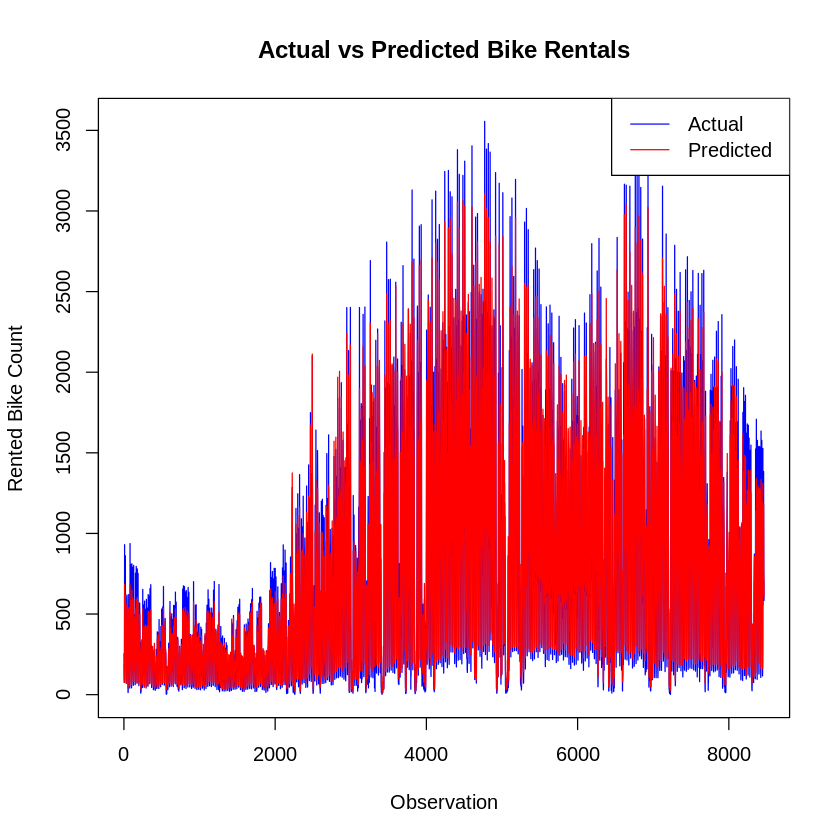

In [ ]:
# In các chỉ số đánh giá hiệu suất mô hình
print(paste("Mean Absolute Error (MAE):", MAE))
print(paste("Root Mean Squared Error (RMSE):", RMSE))
print(paste("R-squared:", R_squared))
print(paste("Mean Absolute Percentage Error (MAPE):", MAPE))

# Vẽ biểu đồ so sánh dữ liệu thực và dự đoán
plot(encoded_data$rented_bike_count, type = "l", col = "blue", ylim = c(0, max(encoded_data$rented_bike_count, predictions)),
     xlab = "Observation", ylab = "Rented Bike Count", main = "Actual vs Predicted Bike Rentals")
lines(predictions, col = "red")
legend("topright", legend = c("Actual", "Predicted"), col = c("blue", "red"), lty = 1)

**Kết quả thu được**
- Có thể thấy kết quả thu được khi sử dụng mô hình random forest lại thu về kết quả tốt hơn khi dùng mô hình hồi quy. Điều đó có thể giải thích vì sao:

  - **Tính linh hoạt của Random Forest**: Random Forest có khả năng làm việc tốt với các dữ liệu phi tuyến và phức tạp. Điều này có nghĩa là nó có thể xử lý được mối quan hệ không tuyến tính giữa các biến đầu vào và biến mục tiêu (số lượng xe đạp thuê), trong khi các mô hình tuyến tính có thể không hiệu quả với các mối quan hệ phức tạp này.

  - **Khả năng xử lý nhiễu và overfitting**: Random Forest có tính năng tự động làm việc với nhiễu và có khả năng giảm thiểu hiện tượng overfitting, điều này giúp mô hình dự đoán tốt hơn trên dữ liệu mới.

  - **Tính ổn định và khả năng mở rộng**: Mô hình Random Forest thường khá ổn định và dễ dàng mở rộng cho các tập dữ liệu lớn hơn mà không cần nhiều điều chỉnh phức tạp.

Do đó, kết quả tốt hơn của mô hình Random Forest so với các mô hình khác có thể được lý giải bởi tính linh hoạt, khả năng xử lý nhiễu và khả năng giải thích cao của nó đối với dữ liệu phức tạp như trong trường hợp của bạn.

# 10. Nhận xét model và chiến lược bài toán

| Mô hình       | R-squared    |
|---------------|---------------|
| Possion Regression| 0.79|
| Weighted Regression |0.66|
|Polynomial Regression|0.66|
|Bsplines |0.69|
|GAM |0.72 |
| Random Forest (Tìm hiểu thêm)| 0.97|


## **Nhận xét**
**Poisson Regression** (R-squared: 0.79)

Giải thích được 79% sự biến thiên trong dữ liệu.
Hiệu quả khá tốt, nhưng có thể hạn chế với dữ liệu phức tạp hoặc phi tuyến tính.
Weighted Regression (R-squared: 0.66)

Giải thích được 66% sự biến thiên trong dữ liệu.
Hiệu quả thấp hơn, phù hợp khi có sự không đồng nhất trong phương sai.

**Polynomial Regression** (R-squared: 0.66)

Giải thích được 66% sự biến thiên trong dữ liệu.
Phù hợp cho mối quan hệ phi tuyến tính đơn giản nhưng kém hiệu quả hơn.

**Bsplines** (R-squared: 0.69)

Giải thích được 69% sự biến thiên trong dữ liệu.
Xử lý tốt mối quan hệ phi tuyến tính nhưng vẫn chưa bằng Poisson Regression.

**GAM** (R-squared: 0.72)

Giải thích được 72% sự biến thiên trong dữ liệu.
Mạnh mẽ với mối quan hệ phi tuyến tính phức tạp, nhưng không vượt qua Poisson Regression.

**Random Forest** (R-squared: 0.97)

Giải thích được 97% sự biến thiên trong dữ liệu.
Hiệu quả vượt trội, xử lý tốt dữ liệu phức tạp và phi tuyến tính, là mô hình tốt nhất.

**Kết luận**
Hiệu suất tốt nhất: **Random Forest** (0.97).
Lựa chọn tốt khác: **Poisson Regression** (0.79) và **GAM** (0.72) cho mô hình đơn giản và dễ giải thích hơn.

## **Chiến lược tổng quát về bài toán dự đoán số lượng xe đạp cần thuê mỗi giờ ở Seoul**

### 1. Mục tiêu
Dự đoán số lượng xe đạp cần thuê mỗi giờ để cung cấp xe đạp cho thuê ổn định và giảm thời gian chờ đợi cho khách hàng.

### 2. Khám phá dữ liệu
- **Đọc và khám phá dữ liệu**: Đọc dữ liệu từ file `SeoulBikeData.csv`, kiểm tra cấu trúc, và thực hiện các bước tiền xử lý cơ bản như chuyển đổi định dạng ngày tháng, tạo các biến phân loại, và xử lý các giá trị thiếu.
- **Tạo các biến**: Tạo các biến phân loại (factor) cho các biến giờ (`Hour`), mùa (`Seasons`), ngày lễ (`Holiday`), và ngày chức năng (`Functional.Day`).

### 3. Tiền xử lý dữ liệu
- **Kiểm tra và xử lý giá trị thiếu**: Nếu có giá trị thiếu, có thể sử dụng các phương pháp như xóa hàng thiếu hoặc điền giá trị trung bình.
- **Chuẩn hóa dữ liệu**: Chuẩn hóa các biến liên tục nếu cần thiết để đảm bảo các biến có cùng đơn vị và tầm giá trị.

### 4. Xây dựng và đánh giá các mô hình
Sử dụng nhiều mô hình khác nhau để dự đoán số lượng xe đạp thuê và so sánh hiệu suất của chúng:

1. **Poisson Regression**
   - Sử dụng mô hình hồi quy Poisson cho dữ liệu đếm.
   - Công thức:
     ```r
     glm(Rented.Bike.count ~ Temperature + Humidity + Windspeed + Visibility + Dew.point.temperature + Solar.radiation + Rainfall + Snowfall + factor(Hour) + factor(Seasons) + factor(Holiday) + factor(Functional.Day), data = data, family = poisson)
     ```
   - Đánh giá hiệu suất bằng R-squared và kiểm tra các ước lượng hệ số.

2. **Weighted Regression**
   - Sử dụng khi có sự không đồng nhất trong phương sai của các sai số.
   - So sánh R-squared với các mô hình khác để đánh giá hiệu suất.

3. **Polynomial Regression**
   - Xử lý các mối quan hệ phi tuyến tính giữa biến độc lập và biến phụ thuộc.
   - So sánh R-squared với các mô hình khác.

4. **Bsplines**
   - Sử dụng các đoạn thẳng bậc cao để tạo ra đường cong mượt mà.
   - So sánh R-squared để đánh giá khả năng xử lý mối quan hệ phi tuyến tính.

5. **Generalized Additive Models (GAM)**
   - Xử lý các mối quan hệ phi tuyến tính phức tạp.
   - So sánh R-squared để đánh giá hiệu suất.

6. **Random Forest**
   - Sử dụng nhiều cây quyết định để cải thiện độ chính xác và tránh overfitting.
   - Đây là mô hình có hiệu suất tốt nhất với R-squared là 0.97, cho thấy khả năng giải thích sự biến thiên trong dữ liệu rất cao.

### 5. Kết quả và chiến lược kinh doanh
- **Kết quả dự đoán**: Sử dụng mô hình tốt nhất để dự đoán số lượng xe đạp cần thuê mỗi giờ dựa trên các yếu tố khí hậu, thời gian trong ngày, mùa, ngày lễ, và ngày chức năng.
- **Chiến lược cung cấp xe đạp**:
  - **Dựa trên thời gian trong ngày**: Đảm bảo số lượng xe đạp đủ trong các giờ cao điểm.
  - **Dựa trên mùa**: Điều chỉnh số lượng xe đạp theo mùa, ví dụ, tăng số lượng xe đạp vào mùa xuân và mùa hè.
  - **Dựa trên ngày lễ**: Đảm bảo số lượng xe đạp đủ vào các ngày lễ và ngày cuối tuần.
  - **Dựa trên dự báo thời tiết**: Điều chỉnh số lượng xe đạp dựa trên dự báo thời tiết như nhiệt độ, độ ẩm, và lượng mưa.

Bằng cách sử dụng các mô hình này, công ty cung cấp dịch vụ cho thuê xe đạp có thể lên kế hoạch và triển khai chiến lược kinh doanh hiệu quả hơn, đảm bảo cung cấp dịch vụ ổn định và nâng cao trải nghiệm của khách hàng.

# 11. Tài liệu tham khảo

Waleed Ejaz. Seoul Bike Sharing - EDA & XGBRegressor. Kaggle. Retrieved from https://www.kaggle.com/code/waleedejaz/seoul-bike-sharing-eda-xgbregressor

Nayana CK. Seoul Bike Data Analysis. Kaggle. Retrieved from https://www.kaggle.com/code/nayanack/seoul-bike-data-analysis

Syed Sharin. Seoul Bike Sharing Demand Prediction. GitHub. Retrieved from https://github.com/syedsharin/Seoul-Bike-Sharing-Demand-Prediction

ResearchGate. Seoul Bike data variables and description. Retrieved from https://www.researchgate.net/figure/Seoul-Bike-data-variables-and-description_tbl1_339266153

Dancer World. Project Title: Seoul Bike Sharing Demand Prediction. Medium. Retrieved from https://medium.com/@dancerworld60/project-title-seoul-bike-sharing-demand-prediction-e1be18f23cbe